# General Knowledge of API

APIs, or Application Programming Interfaces, play a pivotal role in modern software development by facilitating communication and data exchange between different systems. They serve as bridges that allow applications to interact with each other seamlessly, enabling the creation of more robust and interconnected software.

APIs come in various forms, each serving specific purposes in the realm of software development. Let's explore some fundamental concepts:

- **Question 1:** *Name three types of API protocols. Briefly explain the primary use of each.*

  - REST (Representational State Transfer)
- Primary Use: 
REST is widely used for web services and web APIs due to its simplicity and scalability. It leverages standard HTTP methods (GET, POST, PUT, DELETE) for communication and works with resources, which are typically represented as URLs.
- Key Features: 
Stateless communication, caching support, human-readable URLs, and easy integration with web-based applications.

  - SOAP (Simple Object Access Protocol)
- Primary Use: 
SOAP is used for enterprise-level web services where security, reliability, and strict standards are essential. It is a protocol that uses XML-based messaging for communication between client and server.
- Key Features: 
Built-in security (WS-Security), error handling, supports transactions, and operates over multiple protocols (HTTP, SMTP, etc.).


  - (g)RPC (gRPC Remote Procedure Call)
- Primary Use: 
gRPC is a high-performance, open-source framework developed by Google for remote procedure calls (RPC). It is often used in microservices architectures where services need to communicate with low latency and high throughput. It's also suitable for mobile applications and IoT due to its efficiency.
- Key Features:
Protocol Buffers (Protobuf): gRPC uses Protobuf as its interface definition language (IDL) to define the structure of messages, making communication fast and data compact.
HTTP/2: Supports HTTP/2, which allows for features like multiplexing, flow control, and low-latency communication.
Bi-Directional Streaming: Supports streaming requests and responses, making it suitable for real-time applications.
Code Generation: Automatically generates client and server code from .proto files, speeding up development.
  


- **Question 2:** *What are the HTTP response code families? And what do they mean?*

  - Informational Responses(100 Continue): meaning the request was received, and the process is continuing.
  - Success Responses(200 OK): indicate that the request was successfully received, understood, and accepted by the server.
  - Redirection Responses(301 Moved Permanently): mean that further action is needed from the client to complete the request, usually a redirection to another URL.
  - Client Error Responses(404 Not Found): indicate that there was an error on the client side, such as a bad request or unauthorized access.
  - Server Error Responses(500 Internal Server Error): mean that the server encountered an error or is unable to perform the request.

  Understanding these families helps developers diagnose and troubleshoot issues during API interactions.

- **Question 3:** *What do the HTTP response codes 201, 401, and 404 mean?*

  - **201:** 
  Created: The HTTP 201 Created status code indicates that the request was successful and that a resource was created as a result. The new resource is actually created before the response is returned and this new resource is returned in the body of the message. Its location is indicated by the request URL or the contents of the Location header.
  - **401:** 
  401 Unauthorized
  Although the HTTP standard indicates ‘unauthorised’, the semantics of this response correspond to ‘unauthenticated’: the client must authenticate itself in order to obtain the requested response.
  - **404:** 
  404 Not Found
  The server has not found the requested resource.

- **Question 4:** *Name the 4 basic HTTP verbs.*

  - Get : Obtain a ressource
  - Put : Modify a ressource entirely
  - Post : Create a resource
  - Delete : Remove a resource

- **Question 5:** *Explain the difference between PUT and PATCH?*

  - **PUT:** : Modify a ressource entirely

  - **PATCH:** : Partially modify a ressource

- **Question 6:** *Name at least two data formats commonly used in API exchanges.*

  - JSON (JavaScript Object Notation)

  -  XML (Extensible Markup Language)

- **Question 7:** *How can you verify the validity of a resource without getting the entire response?*

 To verify the validity of a ressource in an API without retrieving the entire response, you can use the Http Head. 
- The HEAD Method : The HEAD method is similar to GET but retrieves only the headers of the response, not the body. This makes it ideal for checking resource validity without the overhead of transferring the full content

- **Question 8:** *What are the main concepts of REST? (name them)*
The main concepts of REST (Representational State Transfer) are:

1. **Resources**: The key abstraction of information in REST, which can be any named piece of information or data[3].

2. **Uniform Interface**: A standardized way of interacting with resources using HTTP methods[1][3].

3. **Client-Server Architecture**: Separation of concerns between the client and server components[3].

4. **Statelessness**: Each request from client to server must contain all necessary information[1][3].

5. **Layered System**: A hierarchical architecture that constrains component behavior[3].

6. **Cacheability**: The ability to store frequently accessed data on the client side[2].

7. **Code on Demand** (optional): The ability for servers to extend client functionality by sending executable code[3].

8. **Resource Representations**: The state of a resource at a given time, including data, metadata, and hypermedia links[3].

9. **Self-descriptive Messages**: Requests and responses that contain all information needed for processing[2].

10. **HATEOAS** (Hypermedia as the Engine of Application State): The use of hyperlinks in API responses to guide clients through the application[4].



- **Question 9:** *Can you explain one of the main concepts of your choice from among those you mention? (Give an example if possible)*

  - Statelessness in REST
Statelessness means that each request from a client to a server must contain all the information necessary to understand and process the request. The server should not store any client context between requests. Each request is treated as an independent transaction, unrelated to any previous requests.
  - Example: Book management API
- Each request contains all necessary information (the token for authentication).
- The server doesn't need to maintain session information.
Any server in a cluster can handle the request without needing access to centralized session data.
- This stateless design improves scalability, simplifies server-side architecture, and allows for easier load balancing across multiple servers.


In the subsequent sections, we will delve into practical exercises to apply and deepen our understanding of these concepts using SOAP, REST, and GraphQL APIs.


--------------------------

# Exploring SOAP APIs

### Few elements to remember about the SOAP Protocol

The SOAP protocol, which means Simple Object Access Protocol, is one of the earliest web service protocols. SOAP is an XML-based protocol and was designed to provide a platform/language-independent way to exchange data between different systems over the internet.

### Key Concepts in SOAP:

- **XML-Based Structure:** SOAP messages are structured using XML, making them both human-readable and machine-readable. This structure allows for the encapsulation of data and its transport between systems.

- **Platform and Language Independence:** One of the core objectives of SOAP is to provide a communication method that is independent of the underlying platform or programming language. This promotes interoperability between diverse systems.

- **Message Format:** SOAP messages consist of an envelope that defines the message structure and rules for processing, a set of encoding rules for data types, and conventions for representing remote procedure calls.

- **Transport Neutrality:** SOAP can be used with various transport protocols, including HTTP, SMTP, and more. This flexibility in transport makes it adaptable to different network environments.

### Objective

Obtain and display the capital of the Canada corresponding to the ISO code "CA" using the following SOAP API. 
Step by step guide :

- **Step 1:** Examine the XML structure of the SOAP request provided. Identify the tag name that contains the ISO country code and the tag that will return the capital name.

- **Step 2:** Modify the existing SOAP request to use the ISO code "CA" isntead of "FR". Ensure that the XML structure remains correct.

- **Step 3:** Use the modified request to send a request to the SOAP services at the specified URL.

- **Step 4:** Analyze the response received. Extract and display the capital name from the SOAP response.

- **Step 5:** Remove sections of code that are not necessary to achieve this objective, in order to simply the script.


### Documentation link :

- https://www.postman.com/cs-demo/workspace/postman-customer-org-s-public-workspace/documentation/8854915-43f6a9be-0c65-4486-bfdf-36b6548161dd?entity=request-96a53688-6305-45be-ab8b-ca1d1c88f830
- https://docs.insomnia.rest/

In [4]:
import requests
import xml.etree.ElementTree as ET

# SOAP request URL
url = "http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso"

# structured XML
payload = """<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">
                <soap:Body>
                    <CapitalCity xmlns="http://www.oorsprong.org/websamples.countryinfo">
                        <sCountryISOCode>CA</sCountryISOCode>
                    </CapitalCity>
                </soap:Body>
                </soap:Envelope>"""
# headers
headers = {
    'Content-Type': 'text/xml; charset=utf-8'
}

# POST request
response = requests.request("POST", url, headers=headers, data=payload)

# Parse the XML response
root = ET.fromstring(response.text)

# Extract the capital city
capital = root.find(".//{http://www.oorsprong.org/websamples.countryinfo}CapitalCityResult").text

#print(response.text)
print(f"The capital of Canada is: {capital}")

The capital of Canada is: Ottawa


--------------------------

# REST API Exercise: Star Wars Information Retrieval

### Introduction 

In the exercice, you will explore the Star Wars API (SWAPI) to retrieve and analyze data related to Star Wars characters, films and planets. The SWAPI API is a RESTful web service that provideinformation about Star Wars universe, accessible through various endpoints.\
This exercice is designed to enhance your understanding of working with RESTful APIs, feel free to ask me if you have any question. Each task will build on the previous one so don't hesitate if you are blocked. Make sure to handle bad response code.

### Few elements to remember about the REST Protocol

REST (Representational State Transfer) is an architectural style for designing networked applications. RESTful APIs (Application Programming Interfaces) conform to the principles of REST, allowing systems to communicate over HTTP in a stateless manner; Some important aspects are:

- **Resources:** Everything is a resource, identified by a unique URI.

- **HTTP Methods:** CRUD operations are performed using standard HTTP methods (GET, POST, PUT, DELETE).

- **Stateless:** Each request from a client contains all the information needed to understand and fulfill the request.

### Key Concepts in REST:

- **Endpoint:** A specific URI representing a resource. Endpoints are URLs that define where resources can be accessed.

- **Basic HTTP Methods:** One of the core objectives of SOAP is to provide a communication method that is independent of the underlying platform or programming language. This promotes interoperability between diverse systems.
    - **GET:** Retrieve data from a specified resource.
    - **POST:** Submit data to be processed to a specified resource.
    - **PUT:** Update a resource.
    - **DELETE:** Delete a resource.

- **Request and Response:**
    - **Request:** The client's message to the server, including the HTTP method, headers, and optional data.
    - **Response:** The server's reply to the client's request, containing status information and, optionally, data.


### Objective

- **Step 1: Introduction:** Find some informations about the SWAPI API : the base URL, the Rate limiting and How to auhtenticate. Find information on all available resources withing this API with a request.

- **Step 2: Retrieve Character Information:** Retrieve all characters informations (name, gender, height, ...).

- **Step 3: Retrieve Film Information:** Retrieve all films informations (title, director, release date, ...).

- **Step 4: Retrieve Planet Information:** Retrieve all planets informations (name, population, climate, ...).

- **Step 5: Search and Display:** Create a function to search for and display information about a specific character based on its name. Be sure to handle cases of bad queries and to make at least three unittests with an understandable name.

- **Step 6: Advanced Query:** Store in a pandas dataframe all informations about all the characters of the film you want. Group the characters by species at the end.

- **Step 7: Data Analysis:** Create an advanced query to retrieve information on all the films, and find a way to rank them according to the number of characters in the film.  

- **Step 8 bonus: Additional Endpoint:** Explore an additional endpoint and make a request to display relevant information. For exemple to retrieve starship or vehicles informations.


### Documentation link :

- https://swapi.dev/documentation

# Step 1: Introduction

In [7]:
url = "https://swapi.dev/api/"
params = {}


response = requests.get(url, params=params)
data = response.json()

if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    print("Available resources in SWAPI:")
    for resource, endpoint in data.items():
        print(f"- {resource}: {endpoint}")
else:
    print(f"Error: Unable to retrieve data. Status code: {response.status_code}")

#print("\nRaw JSON data:")
#data

Available resources in SWAPI:
- people: https://swapi.dev/api/people/
- planets: https://swapi.dev/api/planets/
- films: https://swapi.dev/api/films/
- species: https://swapi.dev/api/species/
- vehicles: https://swapi.dev/api/vehicles/
- starships: https://swapi.dev/api/starships/


# Step 2 : Retrieve Character Information

In [34]:
def get_all_characters():
    characters = []
    #url = f"{url}people/"
    url = "https://swapi.dev/api/people/"
    
    while url:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            characters.extend(data['results'])
            url = data['next']
        else:
            print(f"Error: {response.status_code}")
            break
    
    return characters

all_characters = get_all_characters()
for character in all_characters:
    print(f"Name: {character['name']}, Gender: {character['gender']}, Height: {character['height']},Mass:{character['mass']},Hair Color:{character['hair_color']},Birth Year:{character['birth_year']}")

Name: Luke Skywalker, Gender: male, Height: 172,Mass:77,Hair Color:blond,Birth Year:19BBY
Name: C-3PO, Gender: n/a, Height: 167,Mass:75,Hair Color:n/a,Birth Year:112BBY
Name: R2-D2, Gender: n/a, Height: 96,Mass:32,Hair Color:n/a,Birth Year:33BBY
Name: Darth Vader, Gender: male, Height: 202,Mass:136,Hair Color:none,Birth Year:41.9BBY
Name: Leia Organa, Gender: female, Height: 150,Mass:49,Hair Color:brown,Birth Year:19BBY
Name: Owen Lars, Gender: male, Height: 178,Mass:120,Hair Color:brown, grey,Birth Year:52BBY
Name: Beru Whitesun lars, Gender: female, Height: 165,Mass:75,Hair Color:brown,Birth Year:47BBY
Name: R5-D4, Gender: n/a, Height: 97,Mass:32,Hair Color:n/a,Birth Year:unknown
Name: Biggs Darklighter, Gender: male, Height: 183,Mass:84,Hair Color:black,Birth Year:24BBY
Name: Obi-Wan Kenobi, Gender: male, Height: 182,Mass:77,Hair Color:auburn, white,Birth Year:57BBY
Name: Anakin Skywalker, Gender: male, Height: 188,Mass:84,Hair Color:blond,Birth Year:41.9BBY
Name: Wilhuff Tarkin, Ge

# Step 3: Retrieve film information

In [13]:
def get_all_films():
    films = []
    #url = f"{url}people/"
    url = "https://swapi.dev/api/films/"
    
    while url:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            films.extend(data['results'])
            url = data['next']
        else:
            print(f"Error: {response.status_code}")
            break
    
    return films

all_films = get_all_films()
for film in all_films:
    print(f"Title: {film['title']}, Director: {film['director']}, Release Date: {film['release_date']}")

Title: A New Hope, Director: George Lucas, Release Date: 1977-05-25
Title: The Empire Strikes Back, Director: Irvin Kershner, Release Date: 1980-05-17
Title: Return of the Jedi, Director: Richard Marquand, Release Date: 1983-05-25
Title: The Phantom Menace, Director: George Lucas, Release Date: 1999-05-19
Title: Attack of the Clones, Director: George Lucas, Release Date: 2002-05-16
Title: Revenge of the Sith, Director: George Lucas, Release Date: 2005-05-19


# Step 4: Retrieve planet information

In [14]:
def get_all_planets():
    planets = []
    #url = f"{url}people/"
    url = "https://swapi.dev/api/planets/"
    
    while url:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            planets.extend(data['results'])
            url = data['next']
        else:
            print(f"Error: {response.status_code}")
            break
    
    return planets

all_planets = get_all_planets()
for planet in all_planets:
    print(f"Name: {planet['name']}, Population: {planet['population']}, Climate: {planet['climate']}")

Name: Tatooine, Population: 200000, Climate: arid
Name: Alderaan, Population: 2000000000, Climate: temperate
Name: Yavin IV, Population: 1000, Climate: temperate, tropical
Name: Hoth, Population: unknown, Climate: frozen
Name: Dagobah, Population: unknown, Climate: murky
Name: Bespin, Population: 6000000, Climate: temperate
Name: Endor, Population: 30000000, Climate: temperate
Name: Naboo, Population: 4500000000, Climate: temperate
Name: Coruscant, Population: 1000000000000, Climate: temperate
Name: Kamino, Population: 1000000000, Climate: temperate
Name: Geonosis, Population: 100000000000, Climate: temperate, arid
Name: Utapau, Population: 95000000, Climate: temperate, arid, windy
Name: Mustafar, Population: 20000, Climate: hot
Name: Kashyyyk, Population: 45000000, Climate: tropical
Name: Polis Massa, Population: 1000000, Climate: artificial temperate 
Name: Mygeeto, Population: 19000000, Climate: frigid
Name: Felucia, Population: 8500000, Climate: hot, humid
Name: Cato Neimoidia, Pop

# Step 5: Search and Display

In [23]:
import unittest
import requests

def search_character(name):
    url = f"https://swapi.dev/api/people/?search={name}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if data['count'] > 0:
            character = data['results'][0]
            return f"Name: {character['name']}, Gender: {character['gender']}, Height: {character['height']}"
        else:
            return "Character not found"
    else:
        return f"Error: {response.status_code}"

# Unit tests
class TestSearchCharacter(unittest.TestCase):
    def test_existing_character(self):
        result = search_character("Luke Skywalker")
        print(f"Result for Luke Skywalker: {result}")
        self.assertIn("Luke Skywalker", result)
        self.assertIn("Gender:", result)
        self.assertIn("Height:", result)

    def test_non_existing_character(self):
        result = search_character("Blandine")
        self.assertEqual(result, "Character not found")

    def test_partial_name(self):
        result = search_character("Skywalker")
        self.assertIn("Skywalker", result)

In [24]:
def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestSearchCharacter)
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)

# Run the tests
run_tests()

test_existing_character (__main__.TestSearchCharacter.test_existing_character) ... ok
test_non_existing_character (__main__.TestSearchCharacter.test_non_existing_character) ... ok
test_partial_name (__main__.TestSearchCharacter.test_partial_name) ... 

Result for Luke Skywalker: Name: Luke Skywalker, Gender: male, Height: 172


ok

----------------------------------------------------------------------
Ran 3 tests in 0.656s

OK


# Step 6: Advanced Query

In [26]:
import pandas as pd

def get_characters_from_film(film_title):
    films = get_all_films()
    target_film = next((film for film in films if film['title'].lower() == film_title.lower()), None)
    
    if not target_film:
        return "Film not found"
    
    characters_data = []
    for character_url in target_film['characters']:
        response = requests.get(character_url)
        if response.status_code == 200:
            character = response.json()
            characters_data.append({
                'name': character['name'],
                'gender': character['gender'],
                'species': requests.get(character['species'][0]).json()['name'] if character['species'] else 'Unknown'
            })
    
    df = pd.DataFrame(characters_data)
    return df.groupby('species')

# Example usage
characters_df = get_characters_from_film("A New Hope")
print(characters_df.size())

species
Droid       3
Hutt        1
Rodian      1
Unknown    12
Wookie      1
dtype: int64


This result correspond to:
- Droïdes (Droid) : 3 personnages
Probablement C-3PO, R2-D2, et peut-être un autre droïde moins connu.
- Hutt : 1 personnage
Très probablement Jabba the Hutt, bien qu'il n'apparaisse que brièvement dans la version spéciale du film.
- Rodian : 1 personnage
Probablement Greedo, le chasseur de primes qui confronte Han Solo.
- Wookiee : 1 personnage
Sans aucun doute Chewbacca, le copilote de Han Solo.
- Unknown : 12 personnages
C'est le groupe le plus important, suggérant que beaucoup de personnages n'ont pas d'espèce spécifiquement identifiée dans l'API.


# Step 7: Data Analysis

In [27]:
def rank_films_by_characters():
    films = get_all_films()
    film_rankings = [(film['title'], len(film['characters'])) for film in films]
    return sorted(film_rankings, key=lambda x: x[1], reverse=True)

rankings = rank_films_by_characters()
for rank, (title, char_count) in enumerate(rankings, 1):
    print(f"{rank}. {title}: {char_count} characters")

1. Attack of the Clones: 40 characters
2. The Phantom Menace: 34 characters
3. Revenge of the Sith: 34 characters
4. Return of the Jedi: 20 characters
5. A New Hope: 18 characters
6. The Empire Strikes Back: 16 characters


# Step 8 (Bonus): Additional Endpoint

# Starships

In [28]:
def get_starship_info(name):
    url = f"https://swapi.dev/api/starships/?search={name}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if data['count'] > 0:
            starship = data['results'][0]
            return f"Name: {starship['name']}, Model: {starship['model']}, Manufacturer: {starship['manufacturer']}, Cost: {starship['cost_in_credits']} credits"
        else:
            return "Starship not found"
    else:
        return f"Error: {response.status_code}"

# Example usage
print(get_starship_info("Millennium Falcon"))

Name: Millennium Falcon, Model: YT-1300 light freighter, Manufacturer: Corellian Engineering Corporation, Cost: 100000 credits


# Vehicle information

In [31]:
import requests

def get_vehicle_info(name=None):
    base_url = "https://swapi.dev/api/vehicles/"
    
    if name:
        # Search for a specific vehicle
        params = {'search': name}
        response = requests.get(base_url, params=params)
    else:
        # Get all vehicles
        response = requests.get(base_url)
    
    if response.status_code == 200:
        data = response.json()
        vehicles = data['results']
        
        if not vehicles:
            return "No vehicles found."
        
        vehicle_info = []
        for vehicle in vehicles:
            info = f"Name: {vehicle['name']}\n"
            info += f"Model: {vehicle['model']}\n"
            info += f"Manufacturer: {vehicle['manufacturer']}\n"
            info += f"Cost: {vehicle['cost_in_credits']} credits\n"
            info += f"Length: {vehicle['length']} meters\n"
            info += f"Max Speed: {vehicle['max_atmosphering_speed']}\n"
            info += f"Crew: {vehicle['crew']}\n"
            info += f"Passengers: {vehicle['passengers']}\n"
            vehicle_info.append(info)
        
        return "\n".join(vehicle_info)
    else:
        return f"Error: Unable to retrieve vehicle data. Status code: {response.status_code}"

# Example usage
print(get_vehicle_info("Snowspeeder"))
print("\nAll vehicles:")
print(get_vehicle_info())

Name: Snowspeeder
Model: t-47 airspeeder
Manufacturer: Incom corporation
Cost: unknown credits
Length: 4.5 meters
Max Speed: 650
Crew: 2
Passengers: 0


All vehicles:
Name: Sand Crawler
Model: Digger Crawler
Manufacturer: Corellia Mining Corporation
Cost: 150000 credits
Length: 36.8  meters
Max Speed: 30
Crew: 46
Passengers: 30

Name: T-16 skyhopper
Model: T-16 skyhopper
Manufacturer: Incom Corporation
Cost: 14500 credits
Length: 10.4  meters
Max Speed: 1200
Crew: 1
Passengers: 1

Name: X-34 landspeeder
Model: X-34 landspeeder
Manufacturer: SoroSuub Corporation
Cost: 10550 credits
Length: 3.4  meters
Max Speed: 250
Crew: 1
Passengers: 1

Name: TIE/LN starfighter
Model: Twin Ion Engine/Ln Starfighter
Manufacturer: Sienar Fleet Systems
Cost: unknown credits
Length: 6.4 meters
Max Speed: 1200
Crew: 1
Passengers: 0

Name: Snowspeeder
Model: t-47 airspeeder
Manufacturer: Incom corporation
Cost: unknown credits
Length: 4.5 meters
Max Speed: 650
Crew: 2
Passengers: 0

Name: TIE bomber
Model: 

### Postman a powerfull tool for

--------------------------

# Exploring GraphQL APIs

Usefull links:
- https://graphql.org/learn/queries/
- https://graphql-demo.mead.io/

Use this graphQL API to make complex requests on Star Wars world:
- https://swapi-graphql.netlify.app/

On the below cell you have a simple graphQL query.

# Exploring Star Wars Data with GraphQL

### Introduction 

In this exercice you will retrieve the previous results in another way, by consuming the GraphQL API of SWAPI.

### Few elements to remember about the GraphQL Protocol

GraphQL is a powerful query language for APIs that provides a more efficient and flexible alternative to traditional REST APIs. In this exercise, we will interact with the Star Wars API (SWAPI) using GraphQL to retrieve specific information about characters, films, and species from the Star Wars universe. Some important aspects are:

- **Single Endpoint:** GraphQL APIs typically have a single endpoint for all queries, making it more straightforward to manage and interact with.

- **Flexible Responses:** Clients receive exactly the data they request, reducing over-fetching of data common in traditional REST APIs.

- **Introspection:** GraphQL supports introspection, allowing clients to query the schema itself, making it self-documenting and aiding in development.

### Key Concepts in GraphQL:

- **GraphQL Schema:** GraphQL APIs have a schema that defines the types of data available and the relationships between them.

- **Queries:** In GraphQL, clients specify the exact data they need using queries, allowing for more efficient data retrieval.

- **Fields and Nested Structures:** Queries can include specific fields, and GraphQL supports nested structures to retrieve related data in a single request.


### Objective

- **Step 1: Introduction:** Understand the REST API Query. You can use the playground for this : https://swapi-graphql.netlify.app/?query=%7B%0A%20%20allFilms%20%7B%0A%20%20%20%20edges%20%7B%0A%20%20%20%20%20%20node%20%7B%0A%20%20%20%20%20%20%20%20id%2C%0A%20%20%20%20%20%20%20%20title%0A%20%20%20%20%20%20%7D%0A%20%20%20%20%7D%0A%20%20%7D%0A%7D

- **Step 2: Retrieve Films with Character Information:** Retrieve Films with Character Information in a single query.


### Documentation link :

- https://swapi.dev/documentation

# Step 1: Use of the playground Graphi/QL

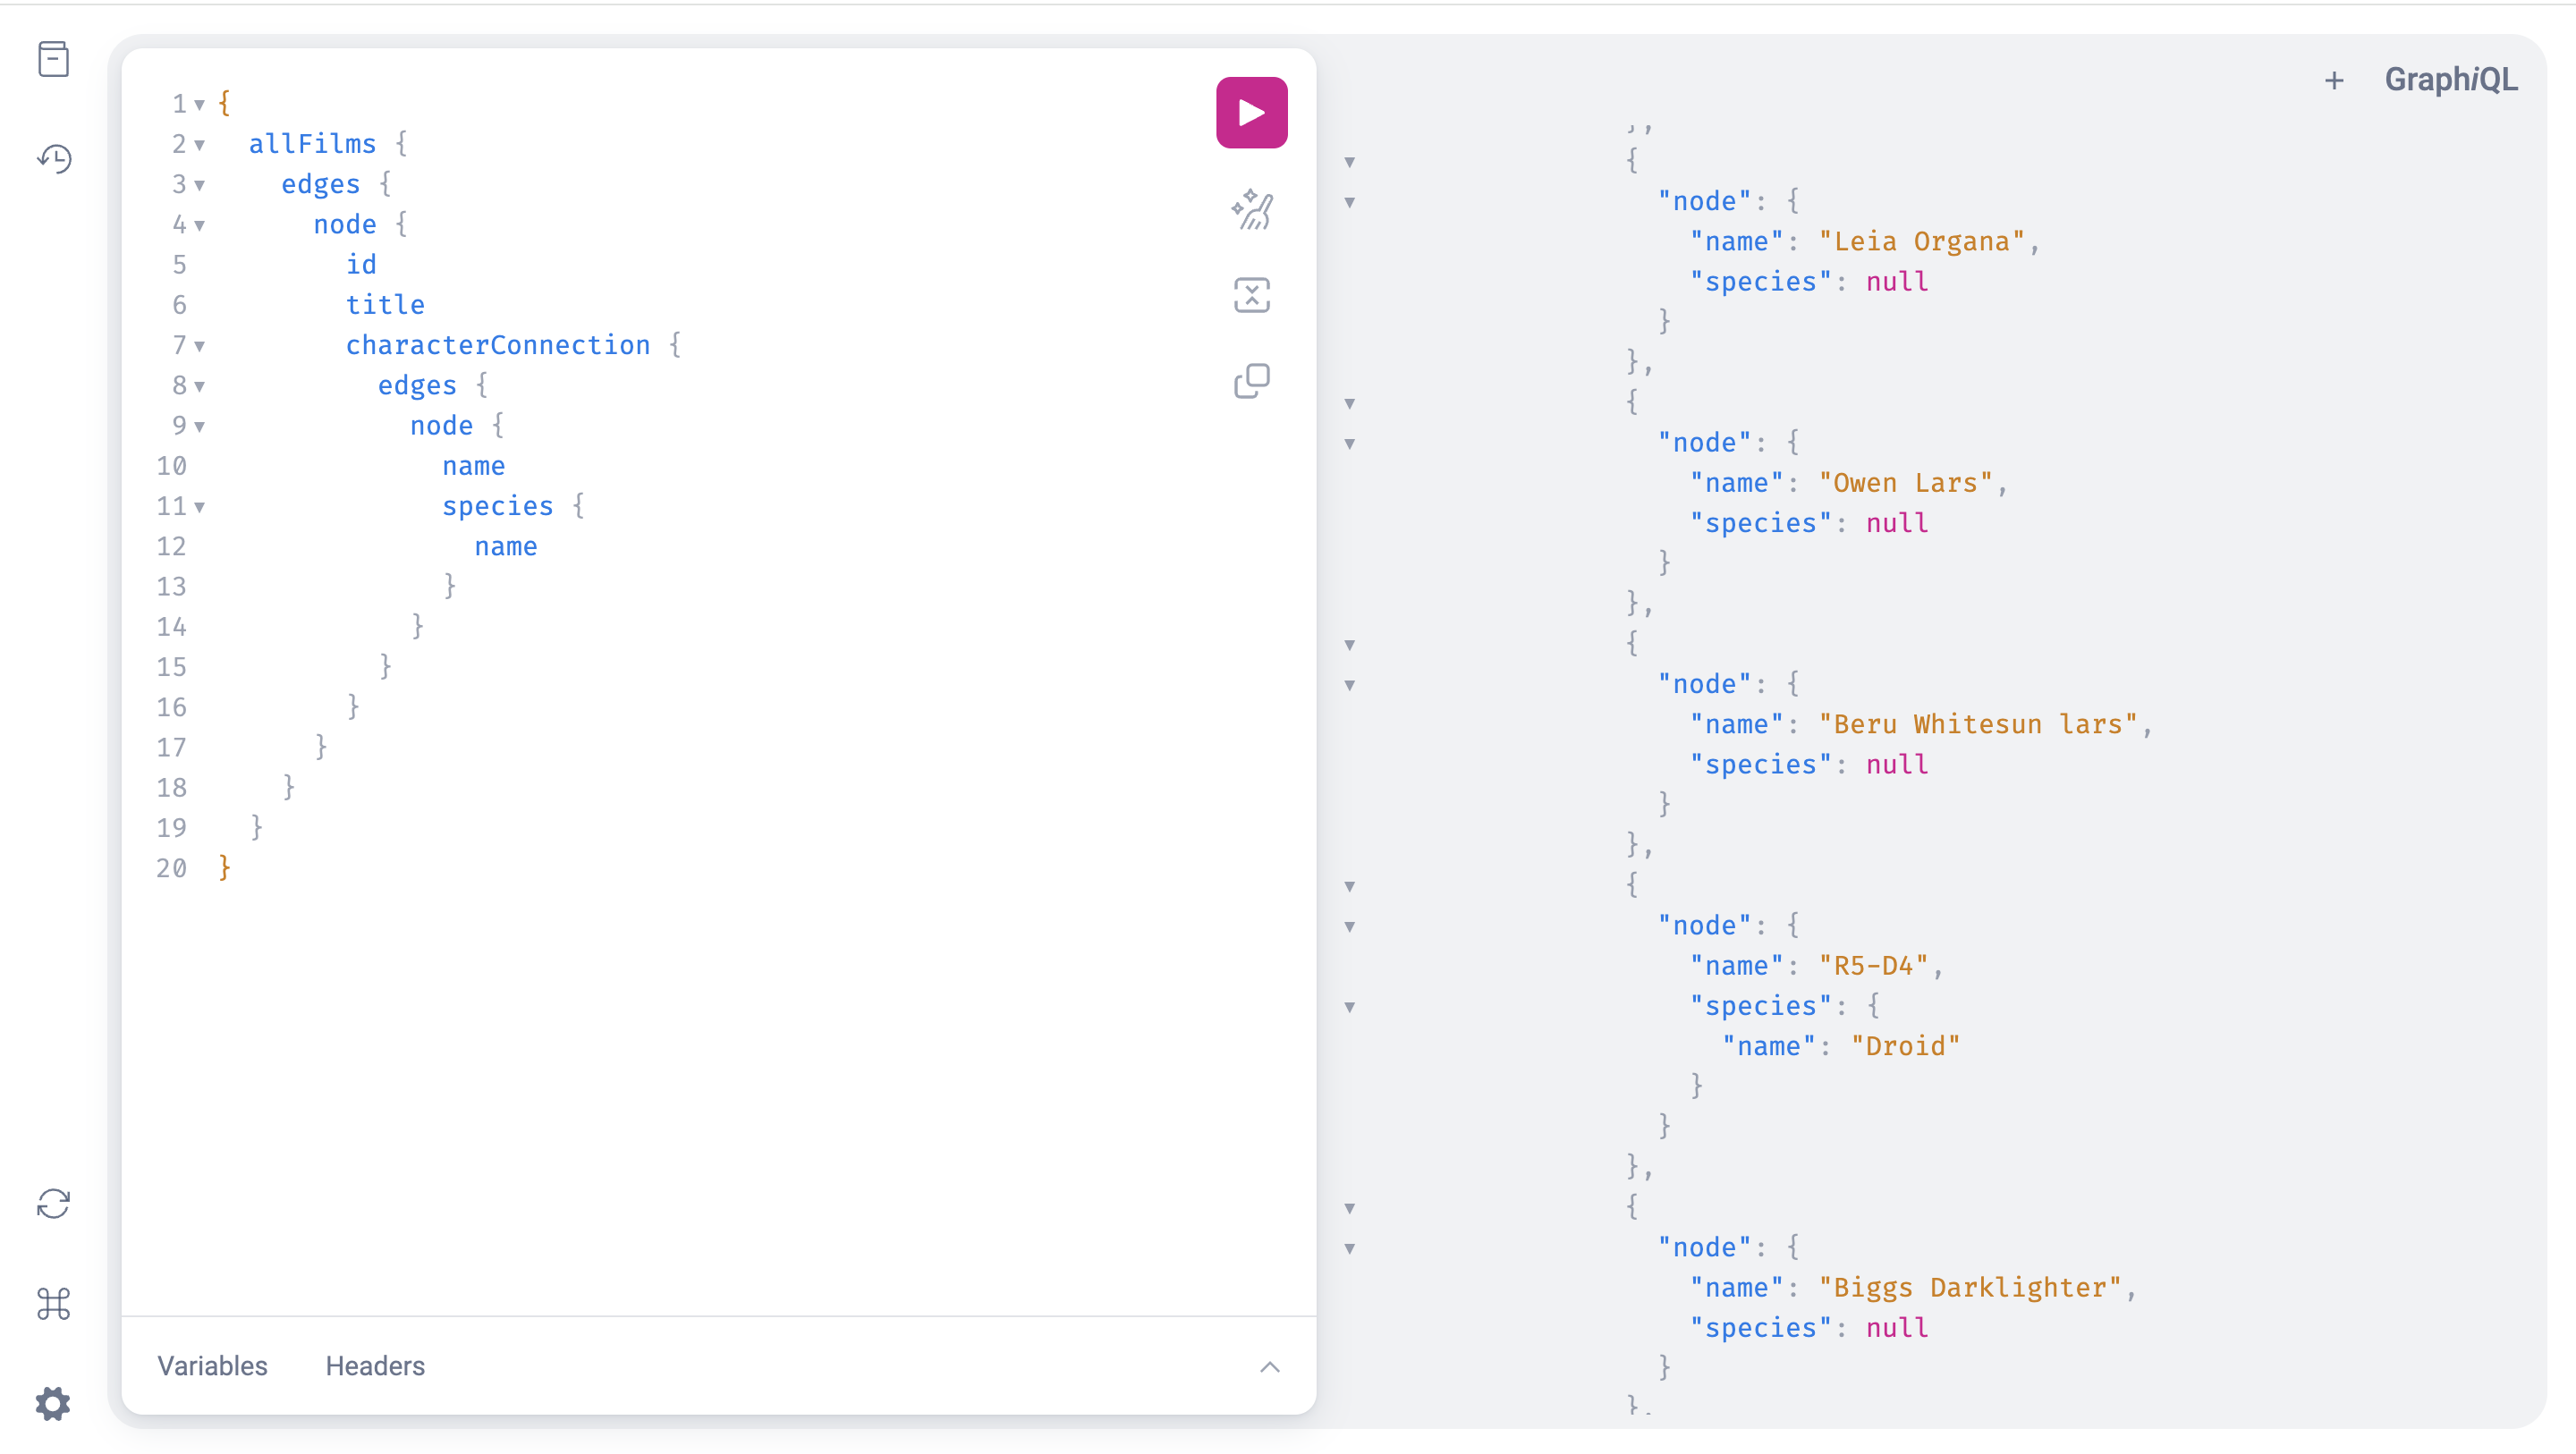

---------------------------

# Step 2: Retrieve Films with Character Information

In [49]:
import requests
 
url = "https://swapi-graphql.netlify.app/.netlify/functions/index"
query = """
{
  allFilms {
    edges {
      node {
        id
        title
        releaseDate
        director
        producers
        characterConnection {
          edges {
            node {
              name
              species {
                name
              }
            }
          }
        }
      }
    }
  }
}
"""
 
response = requests.post(url, json={'query': query})
if response.status_code == 200:
    data = response.json()
    for film in data['data']['allFilms']['edges']:
        print(f"\nFilm: {film['node']['title']}")
        print(f"Release Date: {film['node']['releaseDate']}")
        print(f"Director: {film['node']['director']}")
        print(f"Producers: {', '.join(film['node']['producers'])}")
        print("Characters:")
        for character in film['node']['characterConnection']['edges']:
            char_name = character['node']['name']
            species = character['node']['species']['name'] if character['node']['species'] else "Unknown"
            print(f"  - {char_name} (Species: {species})")
else:
    print("Error:", response.text)


Film: A New Hope
Release Date: 1977-05-25
Director: George Lucas
Producers: Gary Kurtz, Rick McCallum
Characters:
  - Luke Skywalker (Species: Unknown)
  - C-3PO (Species: Droid)
  - R2-D2 (Species: Droid)
  - Darth Vader (Species: Unknown)
  - Leia Organa (Species: Unknown)
  - Owen Lars (Species: Unknown)
  - Beru Whitesun lars (Species: Unknown)
  - R5-D4 (Species: Droid)
  - Biggs Darklighter (Species: Unknown)
  - Obi-Wan Kenobi (Species: Unknown)
  - Wilhuff Tarkin (Species: Unknown)
  - Chewbacca (Species: Wookie)
  - Han Solo (Species: Unknown)
  - Greedo (Species: Rodian)
  - Jabba Desilijic Tiure (Species: Hutt)
  - Wedge Antilles (Species: Unknown)
  - Jek Tono Porkins (Species: Unknown)
  - Raymus Antilles (Species: Unknown)

Film: The Empire Strikes Back
Release Date: 1980-05-17
Director: Irvin Kershner
Producers: Gary Kurtz, Rick McCallum
Characters:
  - Luke Skywalker (Species: Unknown)
  - C-3PO (Species: Droid)
  - R2-D2 (Species: Droid)
  - Darth Vader (Species: Unkn